# 3장 복습

In [1]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


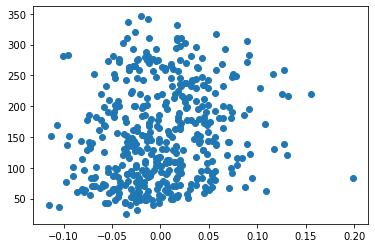

In [2]:
x=diabetes.data[:,5]
y=diabetes.target
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [3]:
class Neuron:
    def __init__(self):
        self.w=1.0
        self.b=1.0
    def forpass(self,x):
        y_hat=x*self.w+self.b
        return y_hat
    def backprop(self,x,err):
        w_inc=err*x*0.2
        b_inc=err*1*0.2
        return w_inc,b_inc
    def fit(self,x,y,epochs=50):
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                y_hat=self.forpass(x_i)
                err=y_i-y_hat
                w_inc, b_inc=self.backprop(x_i,err)
                self.w+=w_inc
                self.b+=b_inc
    def new_fit(self,x,y):
        y_hat=self.forpass(x)
        err=y-y_hat
        w_inc,b_inc=self.backprop(x,err)
        self.w+=w_inc
        self.b+=b_inc
print(x[200],y[200])                

0.0491030249218961 158.0


128.15942626096492
260.75830643956925 115.35540464127132


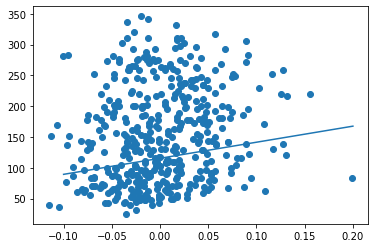

In [4]:
neuron=Neuron()
neuron.fit(x,y)
#neuron.new_fit(x[200],y[200])
plt.scatter(x,y)
plt.plot([-0.1,0.2],[-0.1*neuron.w+neuron.b,0.2*neuron.w+neuron.b])
print(x[200]*neuron.w+neuron.b)
print(neuron.w,neuron.b)

# 4-1. 초기 인공지능 알고리즘 & 로지스틱 회귀

## 이진 분류(binary classification) == True or Flase 택 일

## Perceptron -> Adaline -> logistic regression

### Perceptron : 선형함수 + step function, Step function의 결과로 가중치 update
### Adaline : Perceptron과 동일한데 선형함수의 결과로 가중치 update
### logistic regression : Adaline + activatoin function(비선형 함수)

# 4-2. Sigmoid function

## Odds ratio : p/(1-p) 성공확률:실패확률
## Logit function : z=log(Odds ratio) 특징 : p=0.5일 때 y=0, p=1,-1일 때 각각 양의 무한, 음의 무한
## Logistic function(==sigmoid function) : Logit function을 p=f(z)형태로 나타냄

# 4-3. Logistic loss function

# L=-(y*log(a)+(1-y)*log(1-a)) (y=target, a=output of sigmoid function)

## L이 작아질 수록 a의 값이 이상적인 값이됨.
## 가중치와 절편 update하는 방법은 Linear regression에서 y_hat을 a로 바꾸면 됨.

# 4-4. 분류융 dataset

In [5]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [6]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [7]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

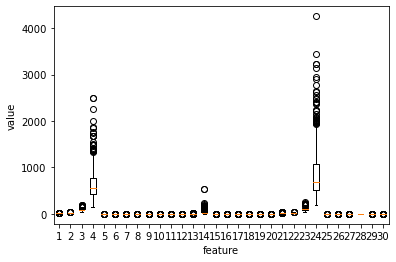

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [9]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [10]:
np.unique(cancer.target,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [11]:
x=cancer.data
y=cancer.target

# 4-5. 로지스틱 회귀를 위한 뉴런

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [13]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [14]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [15]:
class LogisticNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    def forpass(self,x):
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad,b_grad
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                z=self.forpass(x_i)
                a=self.activation(z)
                err=y_i-a
                w_grad, b_grad=self.backprop(x_i,err)
                self.w+=w_grad
                self.b+=b_grad
                #self.w 30갠데 안나누고 해도 되나?
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        a=self.activation(np.array(z))
        return a > 0.5

In [16]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-15-fadd75b91711>:25: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


In [20]:
np.mean(neuron.predict(x_test)==y_test)

<ipython-input-15-fadd75b91711>:25: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


0.8245614035087719